### MSDS422 Assignment 1 Group 4:
#### Exploring and Visualizing COVID 19 Data

COVID 19 is an ongoing threat.  Data for the outbreak are available here:  https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

Data preparation (10 points)
Data exploration (10 points)
Data visualization (10 points)
Data scaling and comparisons (10 points)
Insights from analysis (10 points)

#### To do List
Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  
You should also engage in feature creation and variable transformation.  
At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  
Investigate time series as well as univariate and bivariate distribution graphs. 

# Write Up
Overview – As COVID-19 has impacted our daily lives in the US and around the world, we are seeing science at work to analyze and attempt to understand this novel virus. Our group used data analysis methods in an attempt to better understand how the virus is spreading and attribution.

Data preparation & exploration – We utilized the data source to analyze the 40K+ entries over 13 columns. We checked for missing values and drew up some initial summary statistics to understand the data itself. Then throughout the analysis kept track of any data issues (like negative numbers) to ensure we understood outliers or factors that would skew analysis.

Data visualization & understanding the spread of disease (incidence) as well as fatality rate – 

From there we began to use various tools in Python to analyze (see detail in appendix).  Based on our findings, we came up with the following conclusions around case trends:
1.	From March onwards, there was a sudden spike in the number of cases for Europe which was later matched by the Americas in April 2020.
2.	For Europe, the number of new cases saw a peak in May and then gradually went down until August. From September, Europe is again seeing a spike, which can be attributed to all the common places opening for public again.
3.	For the Americas, we can observe a spike in the number of cases over every month, with an exception of September where we see a month over month decline, for the first time since the onset.
4.	Asia initially had a slow trend in the number of cases. That can be because of a smaller number of testing that has happened because of insufficient number of testing equipment.
5.	After July, we can observe a sudden spike in Asia which can be attributed to the surge in new COVID cases in India post lockdown, i.e. from the month of May 2020 onwards. The same is obvious from the country and month year pivot on number of cases. We can see that Asia has passed monthly cases of Americas in September 2020.
6.	Africa and Oceania/Other are contributing through a small number to the overall number of cases.

We can observe following points on total number of deaths:
1.	From March 2020 onwards, we can see the sudden growth in number of deaths, especially in Europe and America. This aligns in some ways to the data and trend we see with cases.
2.	For Europe we can see that after May 2020, there is a drastic fall in total number of deaths, which by pattern is also in agreement with the pattern shown by number of cases. This can be due to severe lockdown measures implemented by the most affected countries in Europe like United Kingdom, Spain, Russia and Italy.
3.	Americas saw a sudden peak in number of deaths in April 2020, post which there has been a steady month over month growth in the number of COVID related deaths. 
4.	Overall number of deaths compared to the total number of registered cases is less in Asia when compared to other continents. 

In looking at data in the scatter plot we can negative death count for the month "5-2020" and continent "Europe". This may be based on an incorrect entry or an adjustment made in the data for Spain on 25-May-2020, where -372 new cases where registered and -1918 deaths we registered.

Furthermore, if we look at death percentage as a rate of death vs. cases and population per geographic region, we see that Europe had the highest rate of death, followed by America. When visualizing cases, deaths and rate of death in one visual, you see that America is highest in cases and deaths, but Europe had higher rate of death relative to cases. This could be a true indicator of how deadly the virus is, how different geographic regions responded, population density, and also may be skewed based on the number of test / thus cases reported. 




In [ ]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import altair as alt
import json
import os
%matplotlib inline

In [ ]:
#Read training data 
FILE_PATH = os.path.join('')

def load_training_data(file_path=FILE_PATH):
    xl_path = os.path.join(file_path, 'COVID-19-geographic-disbtribution-worldwide-2020-09-14.xlsx')
    return pd.read_excel(xl_path)

#loading the data
df_train = load_training_data()

In [ ]:
df_train.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-14,14,9,2020,75,0,Afghanistan,AF,AFG,38041757.0,Asia,1.456294
1,2020-09-13,13,9,2020,35,0,Afghanistan,AF,AFG,38041757.0,Asia,1.309088
2,2020-09-12,12,9,2020,34,0,Afghanistan,AF,AFG,38041757.0,Asia,1.224970
3,2020-09-11,11,9,2020,28,0,Afghanistan,AF,AFG,38041757.0,Asia,1.164510
4,2020-09-10,10,9,2020,24,2,Afghanistan,AF,AFG,38041757.0,Asia,1.098793


In [ ]:
df_train["month_year"] = df_train["month"].astype(str) + '-' + df_train["year"].astype(str)

In [ ]:
#df1_train = df_train[['month_year', 'cases', 'deaths', 'popData2019', 'continentExp', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]

In [ ]:
#df1_train

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42673 entries, 0 to 42672
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     42673 non-null  datetime64[ns]
 1   day                                                         42673 non-null  int64         
 2   month                                                       42673 non-null  int64         
 3   year                                                        42673 non-null  int64         
 4   cases                                                       42673 non-null  int64         
 5   deaths                                                      42673 non-null  int64         
 6   countriesAndTerritories                                     42673 non-null  object        
 7   geoId                 

In [ ]:
df_train.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,42673.000000,42673.000000,42673.000000,42673.000000,42673.000000,4.260900e+04,39892.000000
mean,15.613901,5.536194,2019.998430,680.738031,21.669580,4.302201e+07,32.222983
std,8.878207,2.167818,0.039594,4243.550272,126.481505,1.582496e+08,74.683457
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.355982e+06,0.353661
50%,15.000000,6.000000,2020.000000,9.000000,0.000000,8.519373e+06,4.435198
75%,23.000000,7.000000,2020.000000,144.000000,3.000000,2.916192e+07,25.673578
max,31.000000,12.000000,2020.000000,97570.000000,4928.000000,1.433784e+09,1058.225943


In [ ]:
# Checking the missing values
df_train.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          184
countryterritoryCode                                            64
popData2019                                                     64
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2781
month_year                                                       0
dtype: int64

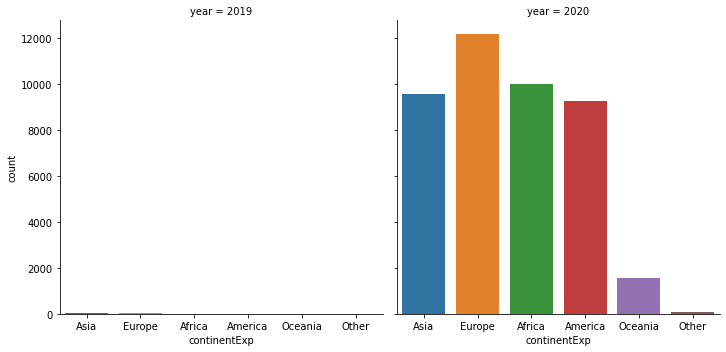

In [ ]:
#Compare by Sex the total number of people who suvived vs not
sns.catplot(x='continentExp', col='year',  data=df_train, kind = 'count') # estimator=sum);

#ax = sns.barplot(x='EXIT', y='VEH_COUNT', data=df_grp, ci=None, estimator=sum)

### Number of cases and death trending over time (i.e. month-year) for each Continent
#### We can observe following points on total number of cases:
1. From March onwards there was a sudden spike in the number of cases for Europe which was later joined by Americas in April 2020.
2. For Europe, the number of new cases saw a peak in May and then it gradually went down until August. From September, Europe is again seeing spike, which can be attributed to all the common places opening for public again.
3. For Americas we can observe a spike in the number of cases over every month, with an exception of September where we see a Month over month decline in September.
4. Asia initially had a slow trend in the number of cases. That can be because of less number of testing that has happened bacause of insufficient number of testing equipments. 
5. Post July, we can observe a sudden spike in Asia which can be attributed to the surge in new corona cases in India post lockdown, i.e. from the month of May 2020 onwards. The same is obvious from the country and month_year pivot on number of cases.  We can see that Asia has passed monthly cases of Americas in September 2020.
6. Africa and 2 others are contributing through a small number to the overall number of cases.

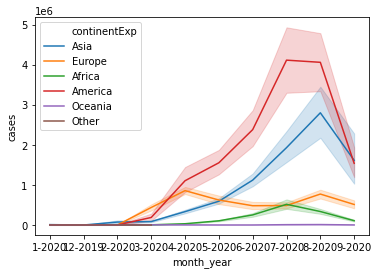

In [ ]:
sns.lineplot(data=df_train, hue = "continentExp", x="month_year", y="cases", estimator="sum");

In [ ]:
x = df_train[(df_train['continentExp']=='Asia')] ## & (df_train['month_year'] == '4-2020')]
#x.groupby(['countriesAndTerritories']).sum()['cases'].reset_index()
x_agg = x.groupby(['countriesAndTerritories','month_year']).agg({'cases':sum})
x_agg.sort_values(['cases'],ascending=False).head(15)

cases
countriesAndTerritories month_year         
India                   8-2020      1982375
                        9-2020      1225182
                        7-2020      1072030
                        6-2020       384697
                        5-2020       149093
Pakistan                6-2020       139841
Philippines             8-2020       128022
Iraq                    8-2020       109914
Turkey                  4-2020       106762
Saudi_Arabia            6-2020       103052
Bangladesh              6-2020        97193
                        7-2020        93088
Saudi_Arabia            7-2020        87783
Iran                    7-2020        76325
                        6-2020        76255

#### We can observe following points on total number of Deaths:
1. From March 2020 onwards, we can see the sudden growth in number of deaths, especially in Europe and America. This aligns in some ways to the data and trend we see with cases.
2. For Europe we can see that after May 2020, there is a drastic fall in total number of deaths, which by pattern is also in agreement with the pattern shown by number of cases. This can be due to severe lockdown measures implemented by the most affected countries in Europe like United Kingdom, Spain, Russia and Italy.
3. The Americas saw a sudden peak in number of deaths in April 2020, post which there has been a steady month over month growth in the number of COVID related deaths.
4. Overall number of deaths compared to the total number of registered cases is less in Asia when compared to other continents.

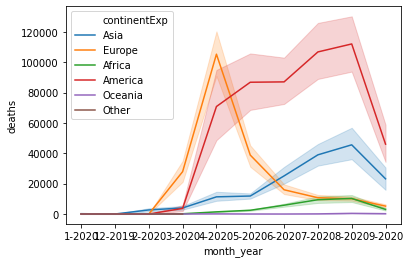

In [ ]:
# How number of deaths trend over time for each Continent
sns.lineplot(data=df_train, hue = "continentExp", x="month_year", y="deaths", estimator="sum");

In [ ]:
x = df_train[(df_train['continentExp']=='Europe')] ## & (df_train['month_year'] == '4-2020')]
#x.groupby(['countriesAndTerritories']).sum()['cases'].reset_index()
x_agg = x.groupby(['countriesAndTerritories','month_year']).agg({'deaths':sum})
x_agg.sort_values(['deaths'],ascending=False).head(15)

deaths
countriesAndTerritories month_year        
United_Kingdom          4-2020       23999
France                  4-2020       21063
Spain                   4-2020       17203
Italy                   4-2020       16091
                        3-2020       11570
United_Kingdom          5-2020       11336
Spain                   3-2020        7340
Belgium                 4-2020        6605
Germany                 4-2020        5705
Italy                   5-2020        5658
France                  5-2020        4684
Russia                  7-2020        4636
                        6-2020        4611
Netherlands             4-2020        3847
Russia                  5-2020        3583

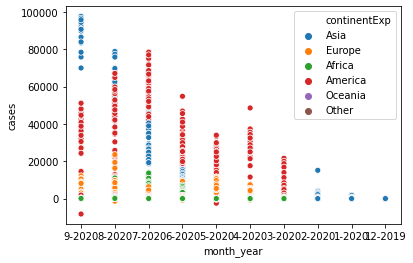

In [ ]:
sns.scatterplot(data=df_train, x="month_year", y="cases", hue="continentExp");

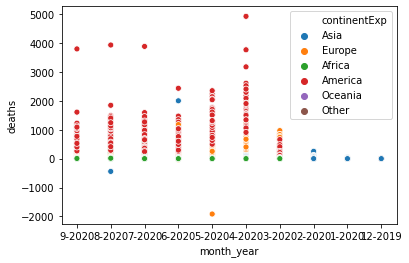

In [ ]:
#sns.swarmplot(data=df_train, x="month_year", y="deaths", hue="continentExp");
sns.scatterplot(data=df_train, x="month_year", y="deaths", hue="continentExp");

#### Data Issue

From the above scatter plot we can negative death count for the month "5-2020" and continent "Europe". 

Investigating this further we can see that there was either a incorrect entry or an adjustment made in the data for Spain on 25-May-2020, where -372 new cases where registered and -1918 deaths we registered.

In [ ]:
neg_death = df_train[(df_train['continentExp']=='Europe') & (df_train['month_year'] == '5-2020')]
neg_death.sort_values(['deaths'],ascending=True).head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,month_year
36521,2020-05-25,25,5,2020,-372,-1918,Spain,ES,ESP,46937060.0,Europe,16.255812,5-2020
355,2020-05-31,31,5,2020,23,0,Albania,AL,ALB,2862427.0,Europe,6.602788,5-2020
19857,2020-05-27,27,5,2020,0,0,Isle_of_Man,IM,IMN,84589.0,Europe,5.910934,5-2020
19858,2020-05-26,26,5,2020,0,0,Isle_of_Man,IM,IMN,84589.0,Europe,7.093121,5-2020
19859,2020-05-25,25,5,2020,0,0,Isle_of_Man,IM,IMN,84589.0,Europe,7.093121,5-2020


In [ ]:
#Conversion to Alpha 2 codes and Continents
#installation
#!pip install pycountry-convert
#!pip install geopy
#!pip install folium

In [ ]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return (0,0)

In [ ]:
cases_by_country = df_train.groupby("countriesAndTerritories")["cases","deaths"].sum()
cases_by_country = cases_by_country.reset_index()
#cases_by_country

C:\Users\viranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#***
lat = []
long = []
for i in range(len(cases_by_country)):
    lat.append(geolocate(cases_by_country['countriesAndTerritories'][i])[0])
    long.append(geolocate(cases_by_country['countriesAndTerritories'][i])[1])
cases_by_country["Lat"] = lat
cases_by_country["Long"] = long
cases_by_country

,countriesAndTerritories,cases,deaths,Lat,Long
0,Afghanistan,38716,1420,33.768006,66.238514
1,Albania,11353,334,41.000028,19.999962
2,Algeria,48254,1612,28.000027,2.999983
3,Andorra,1344,53,42.540717,1.573203
4,Angola,3335,132,-11.877577,17.569124
...,...,...,...,...,...
205,Vietnam,1063,35,13.290403,108.426511
206,Western_Sahara,766,1,0.000000,0.000000
207,Yemen,2013,583,16.347124,47.891527
208,Zambia,13539,312,-14.518624,27.559916


In [ ]:
cases_by_continent = df_train.groupby("continentExp")["cases","deaths"].sum()
cases_by_continent = cases_by_continent.reset_index()
#cases_by_continent

C:\Users\viranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#***
lat = []
long = []
for i in range(len(cases_by_continent)):
    lat.append(geolocate(cases_by_continent['continentExp'][i])[0])
    long.append(geolocate(cases_by_continent['continentExp'][i])[1])
cases_by_continent["Lat"] = lat
cases_by_continent["Long"] = long


In [ ]:
cases_by_continent['death_pct'] = round((cases_by_continent['deaths'] / cases_by_continent['cases'])*100 ,2)

cases_by_continent

,continentExp,cases,deaths,Lat,Long,death_pct
0,Africa,1354032,32620,11.502434,17.757812,2.41
1,America,14935345,513860,51.447704,5.966069,3.44
2,Asia,8557253,163076,51.208697,89.234375,1.91
3,Europe,4170299,214272,51.000000,10.000000,5.14
4,Oceania,31509,871,-18.312800,138.515600,2.76
5,Other,696,7,60.599136,-134.880251,1.01


In [ ]:
#sns.catplot(x='continentExp', hue='continentExp', col='cases', kind='count', data=cases_by_continent);

chart1 = alt.Chart(cases_by_continent).mark_bar().encode(
    x='continentExp',
    y='cases',
    color='continentExp',
    order=alt.Order('continentExp',sort='ascending')
)

chart2 = alt.Chart(cases_by_continent).mark_bar().encode(
    x='continentExp',
    y='deaths',
    color='continentExp'
)

chart3 = alt.Chart(cases_by_continent).mark_bar().encode(
    x='continentExp',
    y='death_pct',
    color='continentExp'
)

(chart1 | chart2 | chart3)

alt.HConcatChart(...)

In [ ]:
# Create a world map to show distributions of users 
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import psycopg2
from area import area
#empty map
#world_map= folium.Map(tiles="cartodbpositron")
#marker_cluster = MarkerCluster().add_to(world_map)

In [ ]:
world_map_country = folium.Map(location =(0, 0),zoom_start=1.5)
world_map_continent = folium.Map(location =(0, 0),zoom_start=1.5)

In [ ]:
#print world_map_country
for i in range(len(cases_by_country)):
    #print(cases_by_country.countriesAndTerritories[i])
    country_location = (cases_by_country.Lat[i],cases_by_country.Long[i])
    folium.Marker(location = country_location,
                     popup = folium.Popup(html=f"Country: {cases_by_country.countriesAndTerritories[i]} has Total Number of Cases:{cases_by_country.cases[i]}, and Total Number of Deaths:{cases_by_country.deaths[i]}",max_width=450)
                 ).\
add_to(world_map_country)
world_map_country

In [ ]:
#print world_map_continent
for i in range(len(cases_by_continent)):
    continent_location = (cases_by_continent.Lat[i],cases_by_continent.Long[i])
    folium.Marker(location = continent_location,
                     popup = folium.Popup(html=f"Continent: {cases_by_continent.continentExp[i]} has Total Number of Cases:{cases_by_continent.cases[i]}, and Total Number of Deaths:{cases_by_continent.deaths[i]}",max_width=450)
                 ).\
add_to(world_map_continent)
world_map_continent

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Figures inline and set visualization style
%matplotlib inline
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import test and train datasets
covid_train ='/content/drive/My Drive/COVID-19-geographic-disbtribution-worldwide-2020-09-26.csv'
df_train = pd.read_csv(covid_train)

In [ ]:
df_train = df_train.drop(['countryterritoryCode', 'day','month', 'year'], axis=1)
df_train.head()

,dateRep,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,9/26/2020,6,2,Afghanistan,AF,38041757.0,Asia,1.540413
1,9/25/2020,16,0,Afghanistan,AF,38041757.0,Asia,1.614016
2,9/24/2020,25,5,Afghanistan,AF,38041757.0,Asia,1.645560
3,9/23/2020,71,2,Afghanistan,AF,38041757.0,Asia,1.642931
4,9/22/2020,30,3,Afghanistan,AF,38041757.0,Asia,1.524640


In [ ]:
df_train = df_train.rename(columns={"dateRep": "date", "countriesAndTerritories": "country/territory", "geoId": "geoID", "continentExp": "continent", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000": "cases in last 14 days per 100000" })
df_train.head()

,date,cases,deaths,country/territory,geoID,popData2019,continent,cases in last 14 days per 100000
0,9/26/2020,6,2,Afghanistan,AF,38041757.0,Asia,1.540413
1,9/25/2020,16,0,Afghanistan,AF,38041757.0,Asia,1.614016
2,9/24/2020,25,5,Afghanistan,AF,38041757.0,Asia,1.645560
3,9/23/2020,71,2,Afghanistan,AF,38041757.0,Asia,1.642931
4,9/22/2020,30,3,Afghanistan,AF,38041757.0,Asia,1.524640


In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_scaled = scaler.fit_transform(df_train[['deaths']])

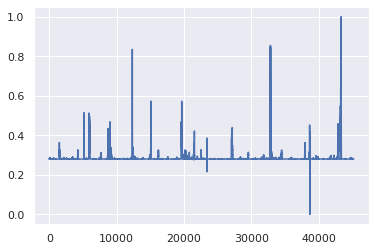

In [ ]:
plt.plot(df_scaled)

In [ ]:
df_train.continent.drop_duplicates()

0          Asia
261      Europe
463      Africa
1115    America
2144    Oceania
8012      Other
Name: continent, dtype: object

In [ ]:
df_train['country/territory'].nunique()

210

In [ ]:
print(df_train['date'])
df_train['date'] = pd.to_datetime(df_train['date'], format="%m/%d/%Y")
print(df_train['date'])

0        9/26/2020
1        9/25/2020
2        9/24/2020
3        9/23/2020
4        9/22/2020
           ...    
45176    3/25/2020
45177    3/24/2020
45178    3/23/2020
45179    3/22/2020
45180    3/21/2020
Name: date, Length: 45181, dtype: object
0       2020-09-26
1       2020-09-25
2       2020-09-24
3       2020-09-23
4       2020-09-22
           ...    
45176   2020-03-25
45177   2020-03-24
45178   2020-03-23
45179   2020-03-22
45180   2020-03-21
Name: date, Length: 45181, dtype: datetime64[ns]


In [ ]:
df_train['deathbypop'] = df_train['deaths']/ df_train['popData2019']

In [ ]:
df_train['deathbypop'] = df_train['deathbypop'].fillna(0)

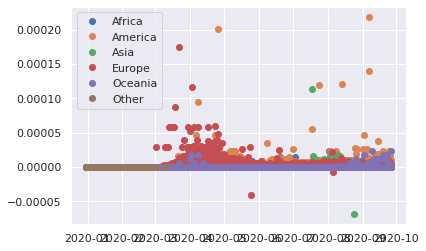

In [ ]:
groups = df_train.groupby('continent')
for name, group in groups:
    plt.plot(group['date'], group['deathbypop'], marker='o', linestyle='', label=name)
plt.legend()

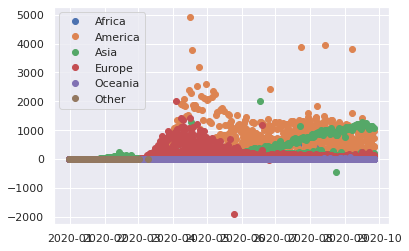

In [ ]:
groups = df_train.groupby('continent')
for name, group in groups:
    plt.plot(group['date'], group['deaths'], marker='o', linestyle='', label=name)
plt.legend()

In [ ]:
df_america = df_train[df_train['continent'] == 'America']
df_asia = df_train[df_train['continent'] == 'Asia']
df_europe = df_train[df_train['continent'] == 'Europe']
df_africa = df_train[df_train['continent'] == 'Africa']
df_oceania = df_train[df_train['continent'] == 'Oceania']

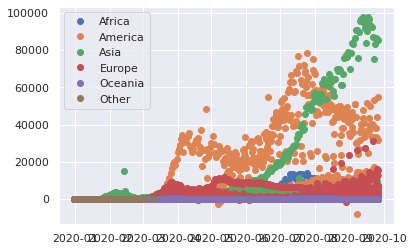

In [ ]:
groups = df_train.groupby('continent')
for name, group in groups:
    plt.plot(group['date'], group['cases'], marker='o', linestyle='', label=name)
plt.legend()

In [ ]:
df_train['deathrate'] = df_train['deaths']/ df_train['cases']

In [ ]:
df_train.head()

,date,cases,deaths,country/territory,geoID,popData2019,continent,cases in last 14 days per 100000,deathbypop,deathrate
0,2020-09-26,6,2,Afghanistan,AF,38041757.0,Asia,1.540413,5.257381e-08,0.333333
1,2020-09-25,16,0,Afghanistan,AF,38041757.0,Asia,1.614016,0.000000e+00,0.000000
2,2020-09-24,25,5,Afghanistan,AF,38041757.0,Asia,1.645560,1.314345e-07,0.200000
3,2020-09-23,71,2,Afghanistan,AF,38041757.0,Asia,1.642931,5.257381e-08,0.028169
4,2020-09-22,30,3,Afghanistan,AF,38041757.0,Asia,1.524640,7.886071e-08,0.100000


In [ ]:
df_train['deathrate'] = df_train['deathrate'].fillna(0)

In [ ]:
df_train.head()

,date,cases,deaths,country/territory,geoID,popData2019,continent,cases in last 14 days per 100000,deathbypop,deathrate
0,2020-09-26,6,2,Afghanistan,AF,38041757.0,Asia,1.540413,5.257381e-08,0.333333
1,2020-09-25,16,0,Afghanistan,AF,38041757.0,Asia,1.614016,0.000000e+00,0.000000
2,2020-09-24,25,5,Afghanistan,AF,38041757.0,Asia,1.645560,1.314345e-07,0.200000
3,2020-09-23,71,2,Afghanistan,AF,38041757.0,Asia,1.642931,5.257381e-08,0.028169
4,2020-09-22,30,3,Afghanistan,AF,38041757.0,Asia,1.524640,7.886071e-08,0.100000


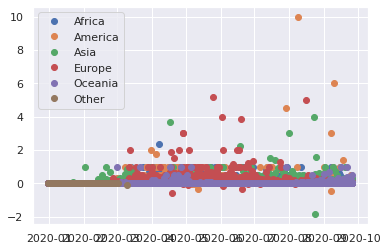

In [ ]:
groups = df_train.groupby('continent')
for name, group in groups:
    plt.plot(group['date'], group['deathrate'], marker='o', linestyle='', label=name)
plt.legend()

In [ ]:
df_america['deathrate'] = df_america['deaths']/ df_america['cases']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


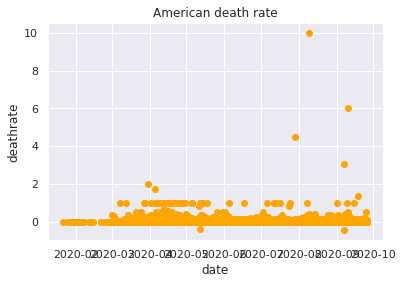

In [ ]:
fig, axis = plt.subplots()
axis.set_xlabel('date')
axis.set_ylabel('deathrate')
plt.title('American death rate')
scatter_plot = axis.scatter(df_america['date'], 
    df_america['deathrate'],
    facecolors = 'orange',
    edgecolors = 'orange')